In [4]:
import numpy as np
from numpy import log10
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftshift, ifftshift
from scipy.integrate import odeint
from scipy import signal
from scipy.signal import firwin, remez,kaiser_atten, kaiser_beta
from scipy.signal import butter, lfilter
%matplotlib inline

# Константы и массивы
sampling_rate=5*10**11
sampling_time = 1/sampling_rate
N = 2048
time_exp = 3*10**(-9) #длительность интервала времени
time = np.arange (0, time_exp, sampling_time)
freq=np.linspace(0, sampling_rate/2, 2048)
lowcut = 2*10**9
highcut = 8*10**9
SNR = 10 #Отношение сигнал шум
amplitude = 0.001
pulse_width = 5 * 10 ** (19)
delay = 1.5 * 10 ** (-9)
fr = 8 * 10**10

In [39]:
# Задание дефолтных параметров графиков
plt.rc('font', size= 16, family='Times New Roman')
plt.rc('lines', linewidth=2, color='k')

In [6]:
# Задание гауссовского импульса
Gaussian_pulse = np.e ** (-pulse_width * (time - delay) ** 2)

# Построение спектра гауссовского импульса
GaussFFT = fft(Gaussian_pulse, N)
spectr_Gauss = 20 * log10(np.abs(GaussFFT) / max(GaussFFT))

C:\Users\Анастасия\AppData\Local\Temp\ipykernel_4364\88360781.py:6: RuntimeWarning: divide by zero encountered in log10
  spectr_Gauss = 20 * log10(np.abs(GaussFFT) / max(GaussFFT))
C:\Users\Анастасия\AppData\Local\Temp\ipykernel_4364\88360781.py:6: RuntimeWarning: invalid value encountered in multiply
  spectr_Gauss = 20 * log10(np.abs(GaussFFT) / max(GaussFFT))


C:\Users\Анастасия\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


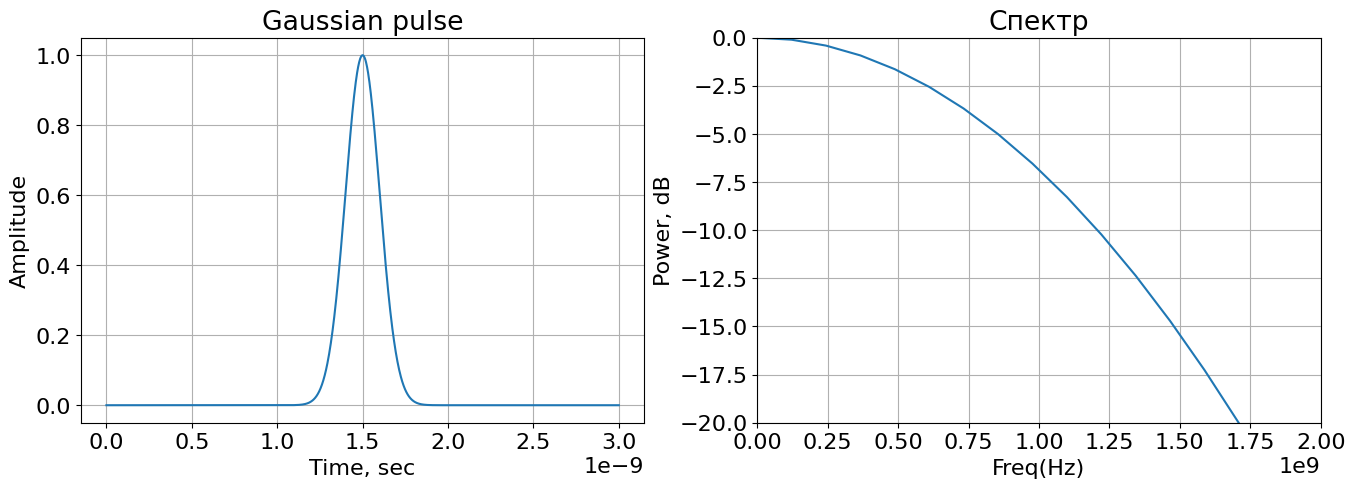

In [7]:
# СКИ во временной и в частотной областях
fig0 = plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.plot(time, Gaussian_pulse)
plt.grid(True)
plt.xlabel("Time, sec")
plt.ylabel("Amplitude")
plt.title("Gaussian pulse")
plt.subplot(1, 2, 2)
plt.plot(freq, spectr_Gauss)
plt.xlabel("Freq(Hz)")
plt.ylabel("Power, dB")
plt.subplots_adjust(hspace=0.4)
plt.xlim(0, 2 * 10**9)
plt.ylim(-20, 0)
plt.title("Спектр")
plt.grid(True)

(-30.0, 0.0)

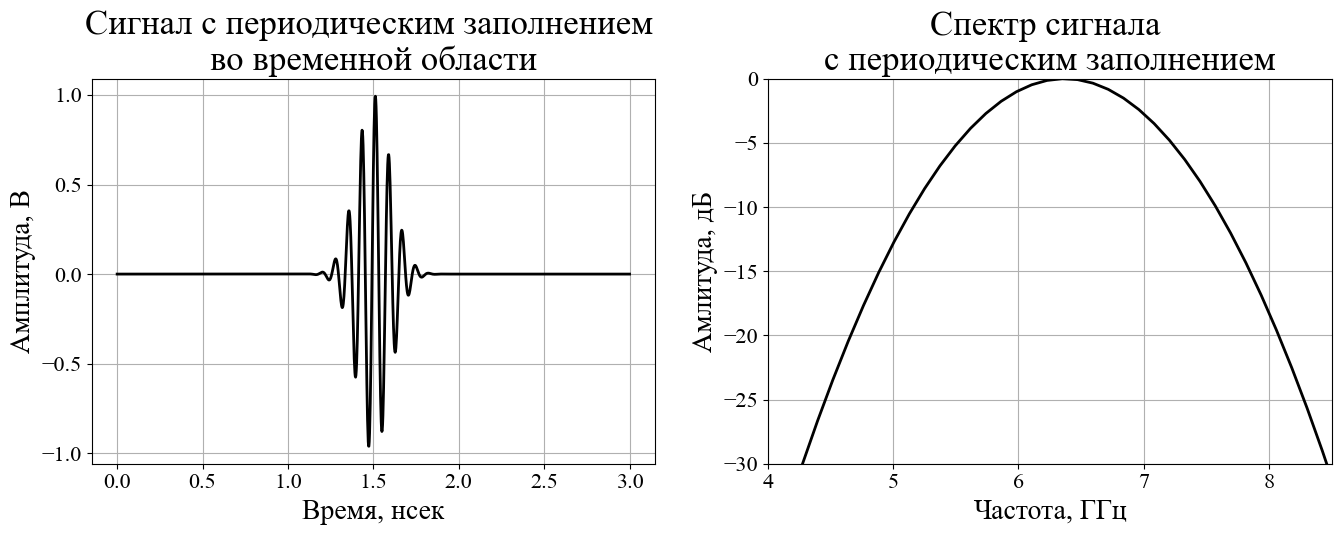

In [45]:
# Периодический сигнал, модулированный СКИ
sin = np.sin(fr* time)
UWB_tip = sin * Gaussian_pulse

# Построение спектра UWB-сигнала
FFT_UWB = fft(UWB_tip, N)
spectr_UWB = 20 * log10(abs(FFT_UWB) / max(abs((FFT_UWB))))

# Построение графиков для UWB сигнала во временной и частотной областях
fig1 = plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.plot(time * 10 ** 9, sin * Gaussian_pulse, color='k')
plt.grid(True)
plt.xlabel("Время, нсек", fontsize=20)
plt.ylabel("Амплитуда, В", fontsize=20)
plt.title("Сигнал с периодическим заполнением \nво временной области", fontsize=25)
plt.subplot(1, 2, 2)
plt.plot(freq/10 ** 9, spectr_UWB, color='k')
plt.grid(True)
plt.xlabel("Частота, ГГц", fontsize=20)
plt.ylabel("Амлитуда, дБ", fontsize=20)
plt.title("Спектр сигнала \nс периодическим заполнением", fontsize=25)
plt.xlim(4, 8.5)
plt.ylim(-30, 0)

In [14]:
# Работа генератора хаоса
x0, y0, z0 = 1, 1, 1  # Начальные условия
g, m = 0.17, 1.567  # Параметры системы

# ДУ системы
t = np.linspace(0, 200, 1501)

def Anishenko_Astahov(xyz, t):
    (
        x,
        y,
        z,
    ) = xyz
    dx_dt = m * x + y - x * z
    dy_dt = -x
    dz_dt = -g * z + g * np.heaviside(x, 0) * x**2
    return dx_dt, dy_dt, dz_dt

# Решение ДУ
h = odeint(Anishenko_Astahov, (x0, y0, z0), t)
# Транспонируем матрицу
x, y, z = h.T
t = time

def rect_wave(x, c, c0):  # Прямоугольная волна с начальной точкой c и шириной c0
    if x >= (c + c0):
        r = 0.0
    elif x < c:
        r = 0.0
    else:
        r = 1
    return r

straight = np.array([rect_wave(t, 1.2 * 10 ** (-9), 1.3 * 10 ** (-9)) for t in time])
chaotic_pulse = x * Gaussian_pulse

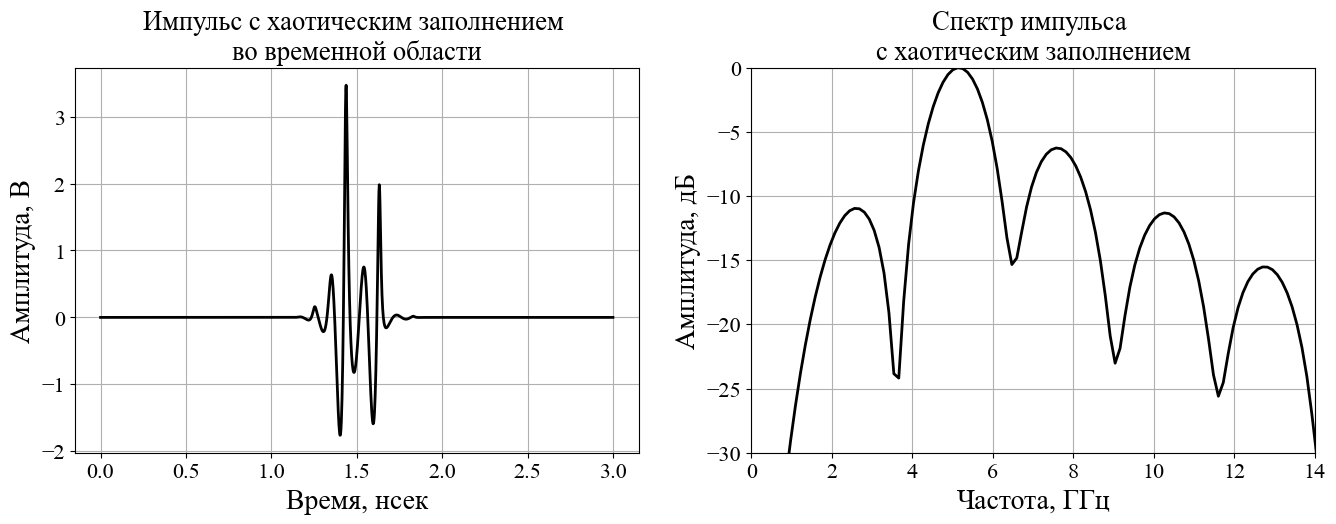

In [46]:
# Построение спектров
spectr_Chaos = abs((fft(x * Gaussian_pulse, N)))
spectr_Chaos_clean = abs((fft(x, N)))
spectr_Chaos_straight = abs((fft(x * straight, N)))

# Хаос во временной и частотной областях
fig2 = plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.plot(time * 10 ** 9, x * Gaussian_pulse, color='k')
plt.grid(True)
plt.xlabel("Время, нсек", fontsize=20)
plt.ylabel("Амплитуда, В", fontsize=20)
plt.title("Импульс с хаотическим заполнением \nво временной области")
plt.subplot(1, 2, 2)
plt.plot(freq/10 ** 9, 20 * log10(spectr_Chaos / max(spectr_Chaos)), color='k')
plt.xlim(0, 14)
plt.ylim(-30, 0)
plt.xlabel("Частота, ГГц", fontsize=20)
plt.ylabel("Амплитуда, дБ", fontsize=20)
plt.title("Спектр импульса \nс хаотическим заполнением")
plt.grid(True)

Text(0, 0.5, 'Amp, dB')

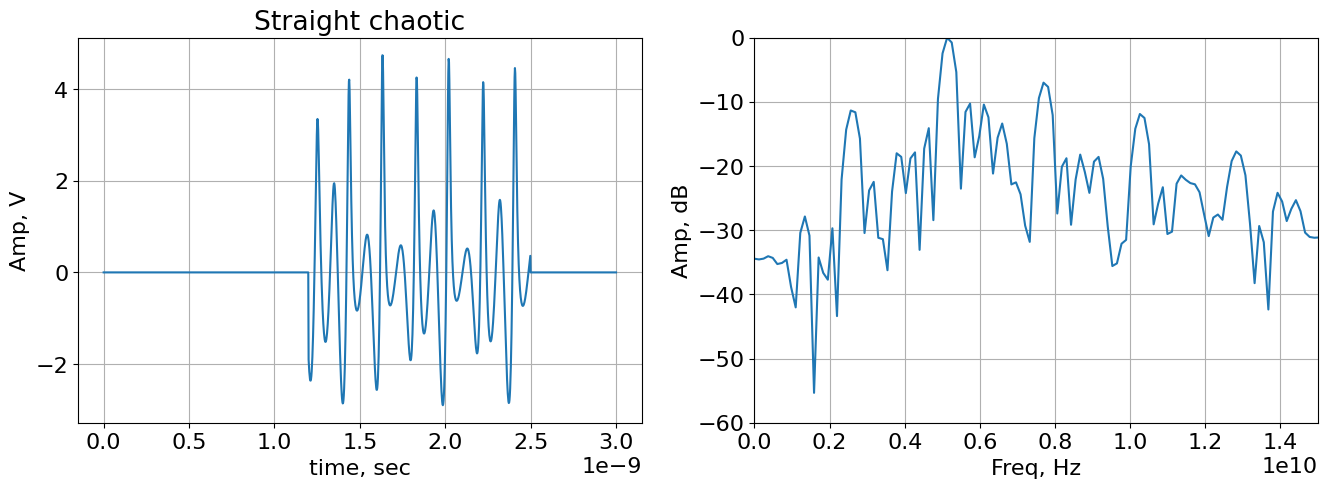

In [16]:
# Построение графика прямохаотического импульса
fig3 = plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.plot(time, straight * x)
plt.grid(True)
plt.xlabel("time, sec")
plt.ylabel("Amp, V")
plt.title("Straight chaotic")
plt.subplot(1, 2, 2)
plt.plot(freq, 20 * np.log10(spectr_Chaos_straight / max(spectr_Chaos_straight)))
plt.grid(True)
plt.xlim(0, 1.5 * 10 ** (10))
plt.ylim(-60, 0)
plt.xlabel("Freq, Hz")
plt.ylabel("Amp, dB")

Text(0.5, 1.0, 'Спектры импульсов')

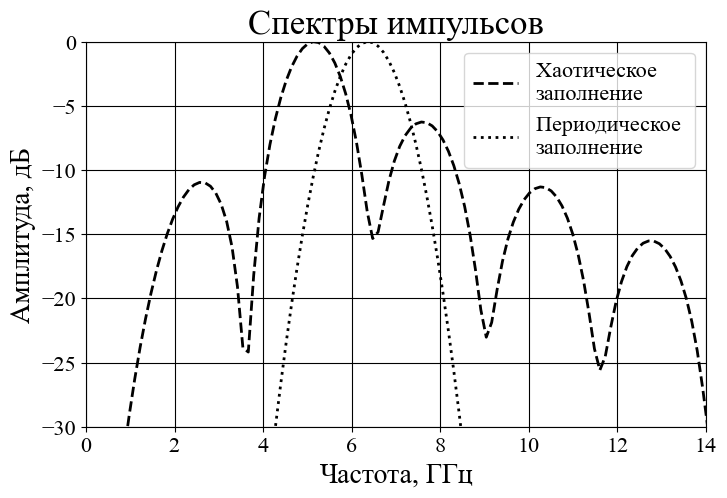

In [48]:
# График спектров UWB-сигнала и спектров с хаосом
fig4 = plt.figure(figsize=(8, 5))
plt.plot(freq/10 ** 9, 20 * np.log10(spectr_Chaos / max(spectr_Chaos)),
         label="Хаотическое \nзаполнение", linestyle = '--', color='k')
plt.plot(freq/10 ** 9, spectr_UWB,
         label="Периодическое \nзаполнение", linestyle = ':', color='k')
# plt.plot(
#     freq,
#     20 * np.log10(spectr_Chaos_clean / max(spectr_Chaos_clean)),
#     label="Чистый хаос",
# )
# plt.plot(
#     freq,
#     20 * np.log10(spectr_Chaos_straight / max(spectr_Chaos_straight)),
#     label="Прямохаотический импульс",
# )
plt.grid(True,  which='major', color='k')
plt.grid(True, which='minor')
plt.legend(loc='upper right')
plt.ylim(-30, 0)
plt.xlim(0, 14)
plt.xlabel("Частота, ГГц", fontsize=20)
plt.ylabel("Амплитуда, дБ", fontsize=20)
plt.title("Спектры импульсов", fontsize=25)

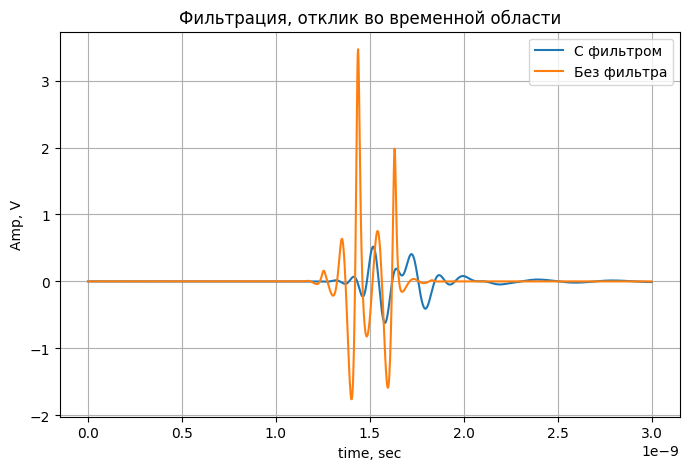

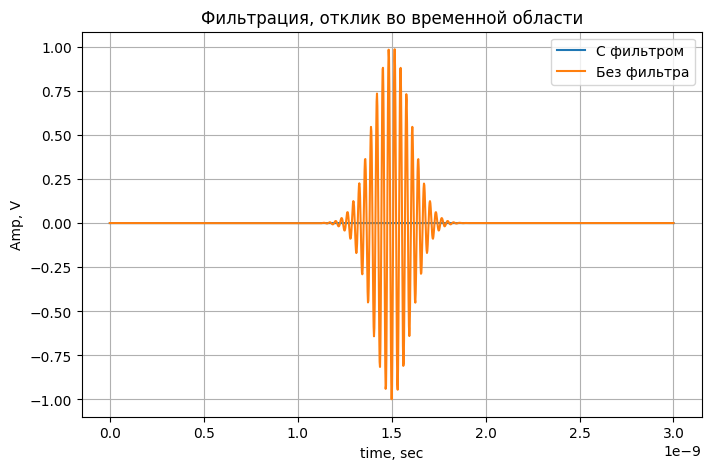

In [9]:
# Пропустим через полосовой фильтр
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype="band")
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

filtedChaos = butter_bandpass_filter(
   chaotic_pulse, lowcut, highcut, sampling_rate, order=5
)  # Фильтруем хаос
filtedUWB = butter_bandpass_filter(UWB_tip, lowcut, highcut, sampling_rate, order=5)

# Отклик хаоса во временной области
fig7 = plt.figure(figsize=(8, 5))
plt.plot(time, filtedChaos, label="С фильтром")
plt.plot(time, x * Gaussian_pulse, label="Без фильтра")
plt.grid(True)
plt.xlabel("time, sec")
plt.ylabel("Amp, V")
plt.title("Фильтрация, отклик во временной области")
plt.legend()

# Отклик UWB во временной области
fig8 = plt.figure(figsize=(8, 5))
plt.plot(time, filtedUWB, label="С фильтром")
plt.plot(time, UWB_tip, label="Без фильтра")
plt.grid(True)
plt.xlabel("time, sec")
plt.ylabel("Amp, V")
plt.title("Фильтрация, отклик во временной области")
plt.legend()

Text(0.5, 1.0, 'Спектры фильтрованых сигналов')

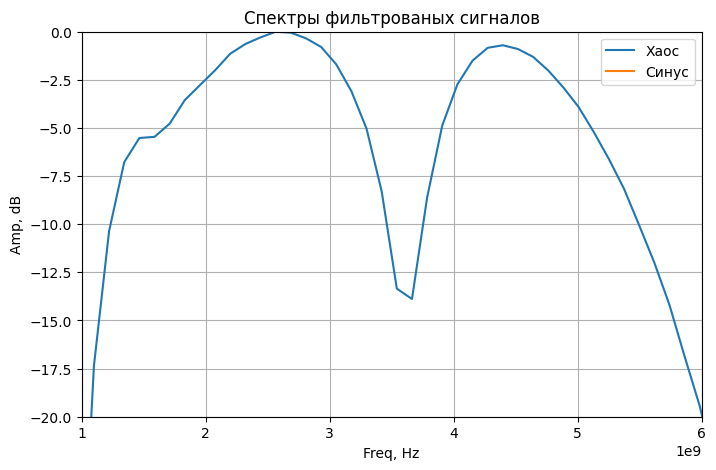

In [10]:
# Спектры хаоса и синуса после фильтра
spectr_Chaos_filt = abs((fft(filtedChaos, N)))
spectr_UWB_filt = abs((fft(filtedUWB, N)))

fig9 = plt.figure(figsize=(8, 5))
plt.plot(freq, 20 * np.log10(spectr_Chaos_filt / max(spectr_Chaos_filt)), label="Хаос")
plt.plot(freq, 20 * np.log10(spectr_UWB_filt / max(spectr_UWB_filt)), label="Синус")
plt.grid(True)
plt.legend()
plt.xlim(1 * 10**9, 6 * 10 ** (9))
plt.ylim(-20, 0)
plt.xlabel("Freq, Hz")
plt.ylabel("Amp, dB")
plt.title("Спектры фильтрованых сигналов")

Text(0.5, 1.0, 'Сигнал после прохождения канала с белым Гауссвоским шумом')

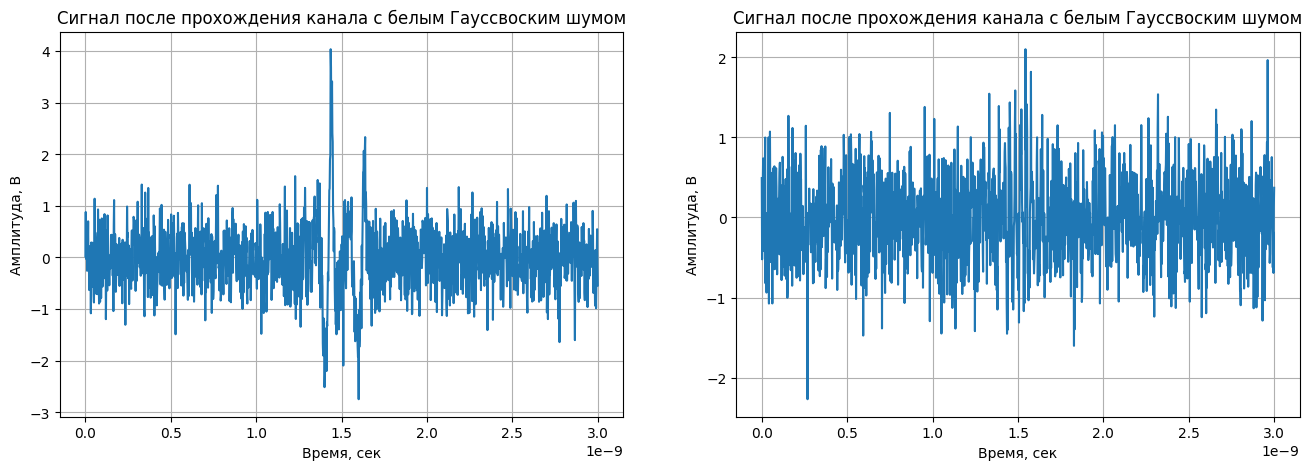

In [11]:
# Моделирование канала связи, простейший случай (без дисперсии, нелинейностей и т.д.). Добавим белый гауссовский шум мощностью 10дБ
def wgn(signal, snr):
    snr = 10 ** (snr / 10.0)
    xpower = np.sum(x**2) / len(x)
    npower = xpower / snr
    return np.random.randn(len(x)) * np.sqrt(npower)

Noise = wgn(x * Gaussian_pulse, SNR)

Noise_UWB = wgn(sin * Gaussian_pulse, SNR)

fig10 = plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.plot(time, Noise + x * Gaussian_pulse)
plt.grid(True)
plt.xlabel("Время, сек")
plt.ylabel("Амплитуда, В")
plt.title("Сигнал после прохождения канала с белым Гауссвоским шумом")
plt.subplot(1, 2, 2)
plt.plot(time, Noise_UWB + sin * Gaussian_pulse)
plt.grid(True)
plt.xlabel("Время, сек")
plt.ylabel("Амплитуда, В")
plt.title("Сигнал после прохождения канала с белым Гауссвоским шумом")

Text(0.5, 1.0, 'Фильтруем сигнал после канала')

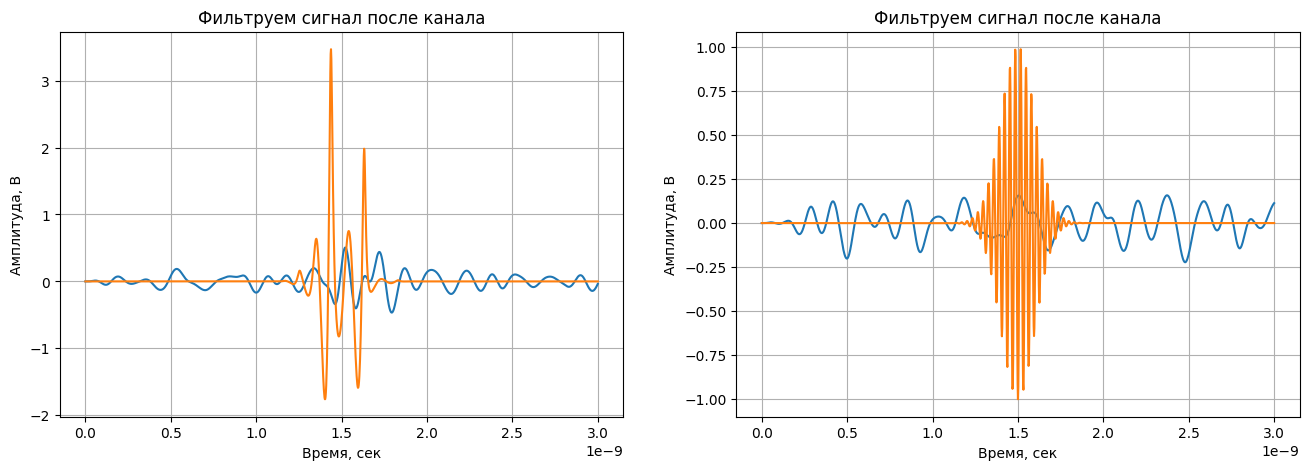

In [12]:
Filt_Noise = butter_bandpass_filter(
    Noise + x * Gaussian_pulse, lowcut, highcut, sampling_rate, order=5
)
Filt_Noise_UWB = butter_bandpass_filter(
    Noise_UWB + sin * Gaussian_pulse, lowcut, highcut, sampling_rate, order=5
)

fig11 = plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.plot(time, Filt_Noise)
plt.plot(time, x * Gaussian_pulse)
plt.grid(True)
plt.xlabel("Время, сек")
plt.ylabel("Амплитуда, В")
plt.title("Фильтруем сигнал после канала")
plt.subplot(1, 2, 2)
plt.plot(time, Filt_Noise_UWB)
plt.plot(time, sin * Gaussian_pulse)
plt.grid(True)
plt.xlabel("Время, сек")
plt.ylabel("Амплитуда, В")
plt.title("Фильтруем сигнал после канала")

In [13]:
# Работа с мощностями сигналов
P_UWB = 10*log10(sum(filtedUWB**2)*time_exp/len(time)/(10**(-3)))
print (P_UWB)
P_chaos = 10*log10(sum(filtedChaos**2)*time_exp/len(time)/(10**(-3)))
print (P_chaos)

-142.51964461624607
-74.15761046682523


In [14]:
# Спектральная маска UWB
low_UWB = 3.1*10**9
high_UWB = 10.6*10**9
max_density = -41.3 #дБм/МГц
fisrt_range = np.linspace(960*10**6, 1610*10**6, 1000) #Первый диапазон значений частот спектральной маски UWB, МГц
first_meaning = -75.3 #Значение emission limit, дБм/МГц
second_range = np.linspace (1610*10**6, 1990*10**6, 1000) #Второй частотный диапазон
second_meaning = -53.3
third_range = np.linspace (1990*10**6, 3100*10**6, 1000) #Третий частотный диапазон
third_meaning = -51.3
fouth_range = np.linspace (3100*10**6, 10600*10**6, 10000)#Четвертый частотный диапазон
fouth_meaning = -41.3
fifth_range = np.linspace (10600, 29000, 10000) #Пятый частотный диапазон, высшие частоты
fifth_meaning = -51.3

C:\Users\Анастасия\AppData\Local\Temp\ipykernel_16144\3848254291.py:22: RuntimeWarning: divide by zero encountered in log10
  plt.plot (freq, 20 * np.log10(spectr_UWB), label = "Синус")
C:\Users\Анастасия\AppData\Local\Temp\ipykernel_16144\3848254291.py:22: RuntimeWarning: invalid value encountered in log10
  plt.plot (freq, 20 * np.log10(spectr_UWB), label = "Синус")


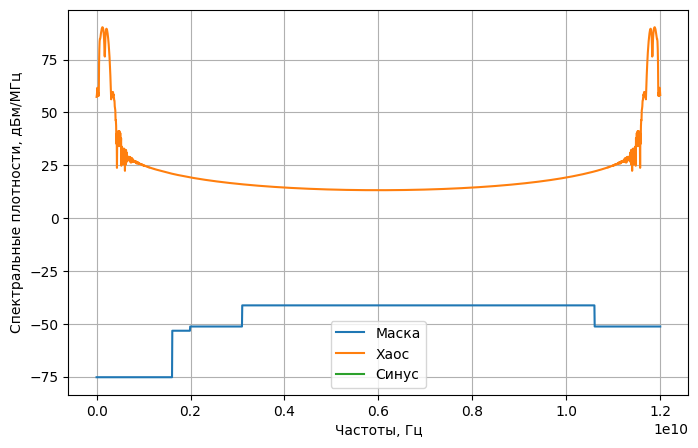

In [15]:
#Построение картинки спектральной маски для UWB
freq = np.linspace (0, 12*10**9, 2048)
UWB_mask = []
for i in freq:
    if i<1610*10**6:
        UWB_mask=np.append(UWB_mask, first_meaning)
    elif i>=1610*10**6 and i<1990*10**6:
       UWB_mask=np.append(UWB_mask, second_meaning)
    elif i>=1990*10**6 and i<3100*10**6:
        UWB_mask=np.append(UWB_mask, third_meaning)
    elif i>=3100*10**6 and i<10600*10**6:
        UWB_mask=np.append(UWB_mask, fouth_meaning)
    elif i>=10600*10**6:
        UWB_mask=np.append(UWB_mask, fifth_meaning)

fig12 = plt.figure(figsize=(8, 5))
plt.plot (freq, UWB_mask, label = "Маска")
plt.grid(True)
plt.xlabel("Частоты, Гц")
plt.ylabel("Спектральные плотности, дБм/МГц")
plt.plot (freq, 20 * np.log10(spectr_Chaos_filt/10**(-3)), label = "Хаос")
plt.plot (freq, 20 * np.log10(spectr_UWB), label = "Синус")
plt.legend()

Text(0.5, 1.0, 'Spectrum')

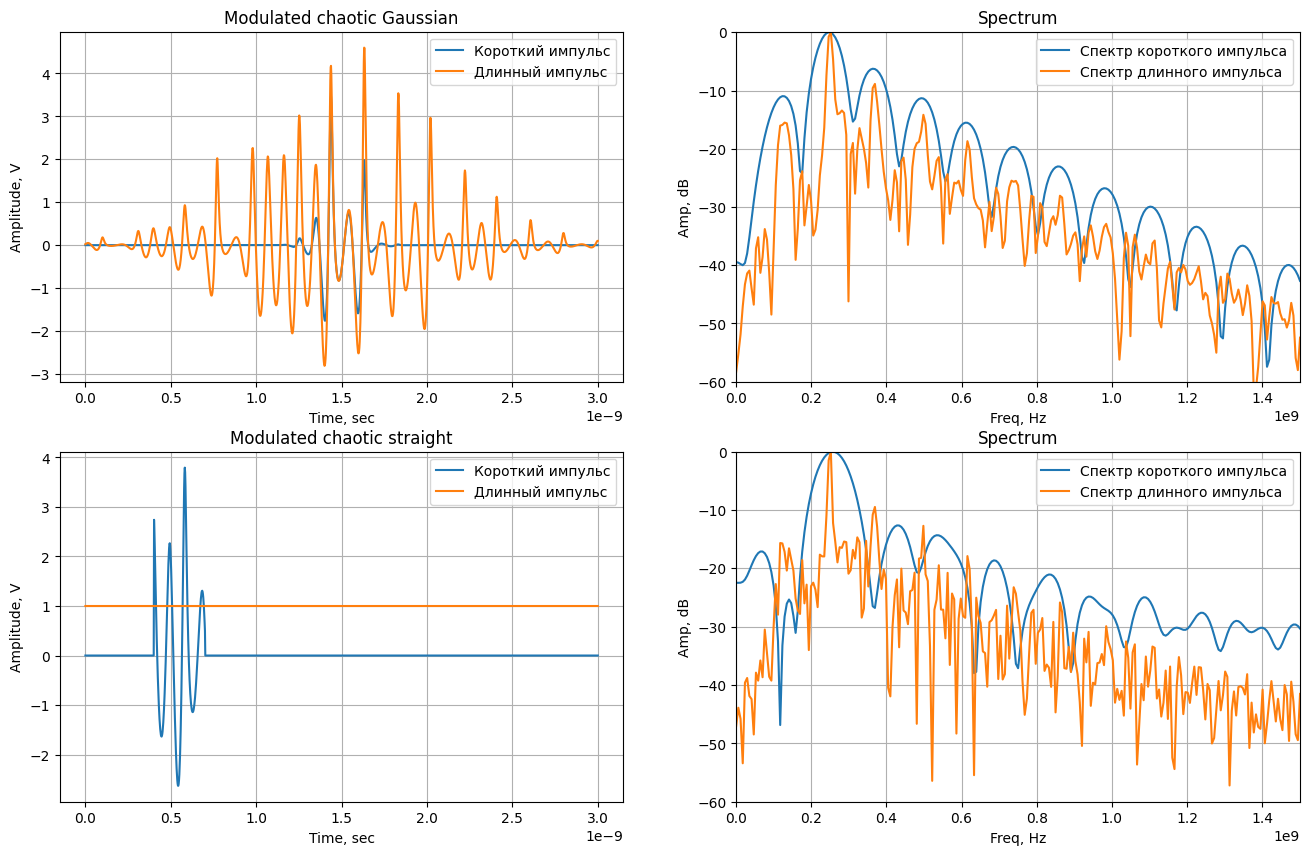

In [26]:
#Исследование изменения формы спектра от изменения длительности модулирующего импульса, Гауссовский импульс

pulse_width_x10 = pulse_width / 30
Gaussian_pulse_x4 = np.e ** (-pulse_width_x10 * (time - delay) ** 2)

Chaotic_UWB = x * Gaussian_pulse
Chaotic_UWB_x2 = x * Gaussian_pulse_x2
Chaotic_UWB_x4 = x * Gaussian_pulse_x4

spectr_Chaos_UWB = abs((fft(x * Gaussian_pulse, N)))
spectr_Chaos_UWB_x2 = abs((fft(x * Gaussian_pulse_x2, N)))
spectr_Chaos_UWB_x4 = abs((fft(x * Gaussian_pulse_x4, N)))

Straight_pulse = np.array([rect_wave(t, 0.4 * 10 ** (-9), 0.3 * 10 ** (-9)) for t in time])
Straight_pulse_x2 = np.array([rect_wave(t, 0, 3 * 10 ** (-9)) for t in time])
Straight_pulse_x4 = np.array([rect_wave(t, 1.2 * 10 ** (-9), 1.6 * 10 ** (-9)) for t in time])

spectr_Chaos_rect = abs((fft(x * Straight_pulse, N)))
spectr_Chaos_rect_x2 = abs((fft(x * Straight_pulse_x2, N)))
spectr_Chaos_rect_x4 = abs((fft(x * Straight_pulse_x4, N)))

fig13 = plt.figure(figsize=(16, 10))
plt.subplot(2, 2, 1)
plt.plot(time, Chaotic_UWB, label = 'Короткий импульс')
plt.plot (time, Chaotic_UWB_x4, label = 'Длинный импульс')
plt.grid(True)
plt.xlabel("Time, sec")
plt.ylabel("Amplitude, V")
plt.title("Modulated chaotic Gaussian")
plt.legend()
plt.subplot(2, 2, 2)
plt.plot(freq, 20 * log10(spectr_Chaos_UWB / max(spectr_Chaos_UWB)), label = 'Спектр короткого импульса' )
plt.plot(freq, 20 * log10(spectr_Chaos_UWB_x4 / max(spectr_Chaos_UWB_x4)), label = 'Спектр длинного импульса' )
plt.xlim(0, 1.5 * 10 ** (9))
plt.ylim(-60, 0.1)
plt.xlabel("Freq, Hz")
plt.ylabel("Amp, dB")
plt.title("Spectrum")
plt.grid(True)
plt.legend()
plt.subplot(2, 2, 3)
plt.plot(time, x * Straight_pulse, label = 'Короткий импульс')
plt.plot (time, Straight_pulse_x2, label = 'Длинный импульс')
plt.grid(True)
plt.xlabel("Time, sec")
plt.ylabel("Amplitude, V")
plt.title("Modulated chaotic straight")
plt.legend()
plt.subplot(2, 2, 4)
plt.plot(freq, 20 * log10(spectr_Chaos_rect / max(spectr_Chaos_rect)), label = 'Спектр короткого импульса' )
plt.plot(freq, 20 * log10(spectr_Chaos_rect_x2 / max(spectr_Chaos_rect_x2)), label = 'Спектр длинного импульса' )
plt.xlim(0, 1.5 * 10 ** (9))
plt.ylim(-60, 0)
plt.xlabel("Freq, Hz")
plt.ylabel("Amp, dB")
plt.grid(True)
plt.legend()
plt.title("Spectrum")